## Explorando Inicialmente a Base de Dados de Regressão


- Não apresenta dados faltantes
- Existe uma diferença significativa entre a magnitude das variáveis
- A feature `X1` (Transaction date) é uma variável não apresenta muita correlação com o target `Y` (House price of unit area), o que pode indicar que não é uma variável relevante para prever o preço da casa.
-


In [1]:
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# fetch dataset
real_estate_valuation = fetch_ucirepo(id=477)

# data (as pandas dataframes)
X = real_estate_valuation.data.features
y = real_estate_valuation.data.targets

# metadata
print(real_estate_valuation.metadata)

# variable information
print(real_estate_valuation.variables)


{'uci_id': 477, 'name': 'Real Estate Valuation', 'repository_url': 'https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set', 'data_url': 'https://archive.ics.uci.edu/static/public/477/data.csv', 'abstract': 'The real estate valuation is a regression problem. The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. ', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 414, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y house price of unit area'], 'index_col': ['No'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5J30W', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 373, 'type': 'NATIVE', 'title': 'Building real estate valuation models with comparative approach through case-based reasoning', 'authors': 'I. Yeh

### Quais as Variáveis do Dataset?

In [2]:

print("Features:")
display(X.head())

print("Targets:")
display(y.head())

Features:


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


Targets:


,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


In [3]:
X.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270


### Existem Dados Faltantes?

In [4]:
X.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
dtype: int64

In [5]:
y.isnull().sum()

Y house price of unit area    0
dtype: int64

In [6]:
# X.loc[:, 'X1_year'] = X['X1 transaction date'].astype(str).str[:4].astype(int)
# X['X1_year']

### Características dos Dados

X1 transaction date: float64


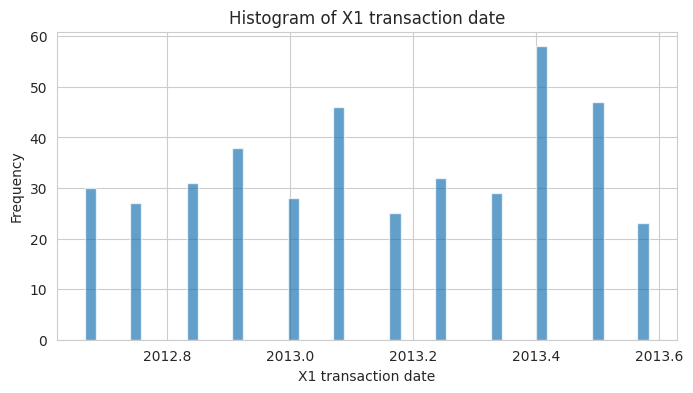

X2 house age: float64


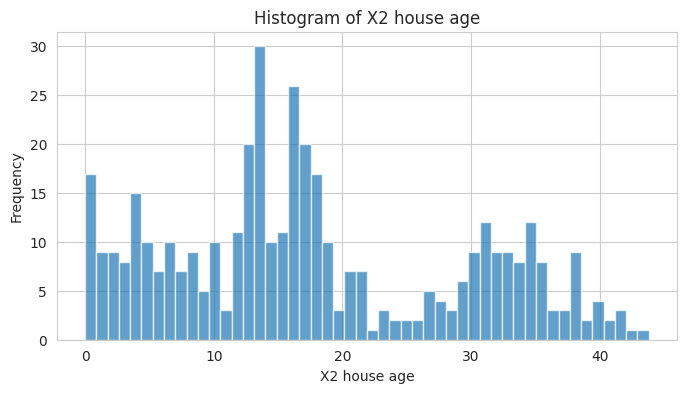

X3 distance to the nearest MRT station: float64


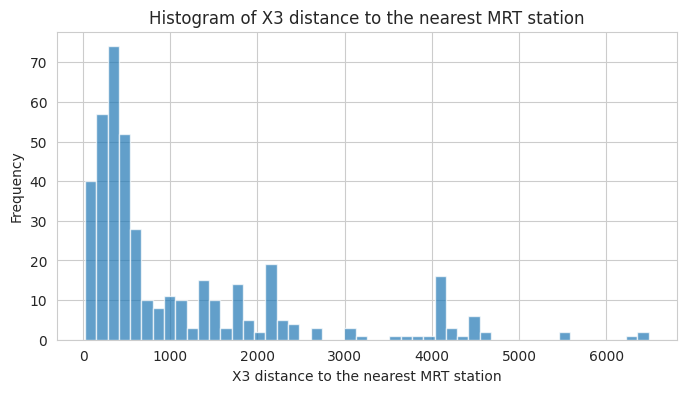

X4 number of convenience stores: int64


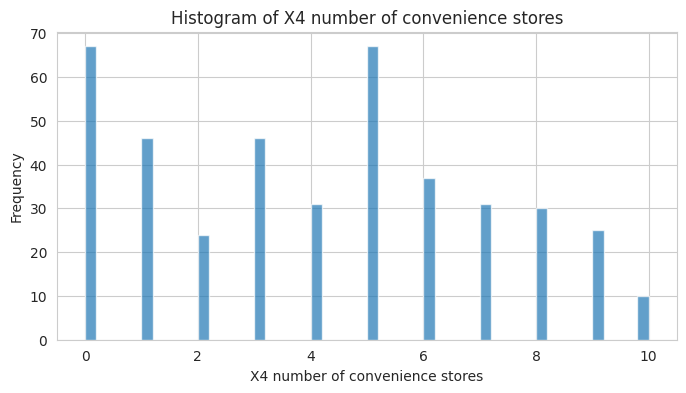

X5 latitude: float64


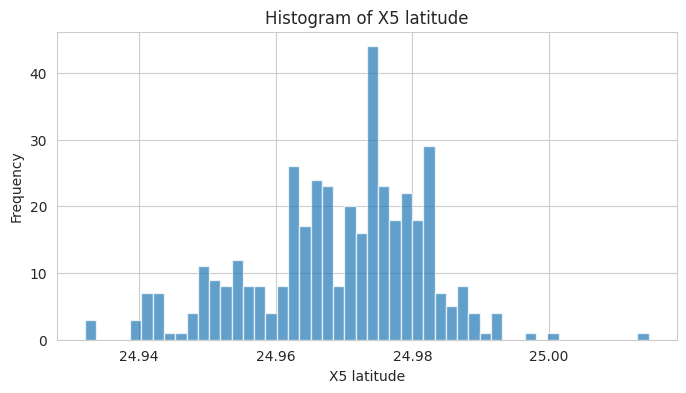

X6 longitude: float64


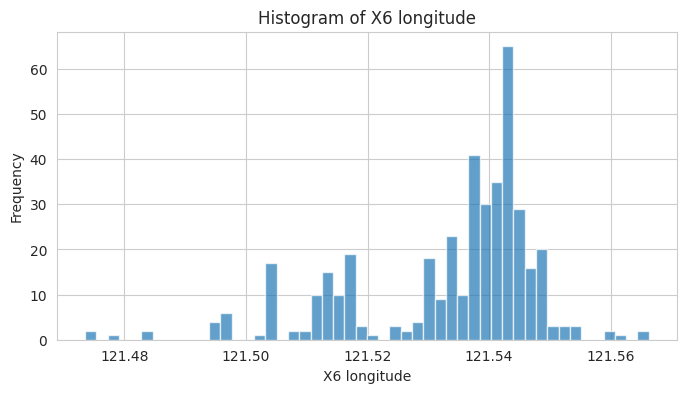

In [7]:
for col in X.columns:
    print(f"{col}: {X[col].dtype}")
    plt.figure(figsize=(8, 4))
    X[col].plot.hist(bins=50, alpha=0.7)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [8]:
data = pd.concat([X, y], axis=1)

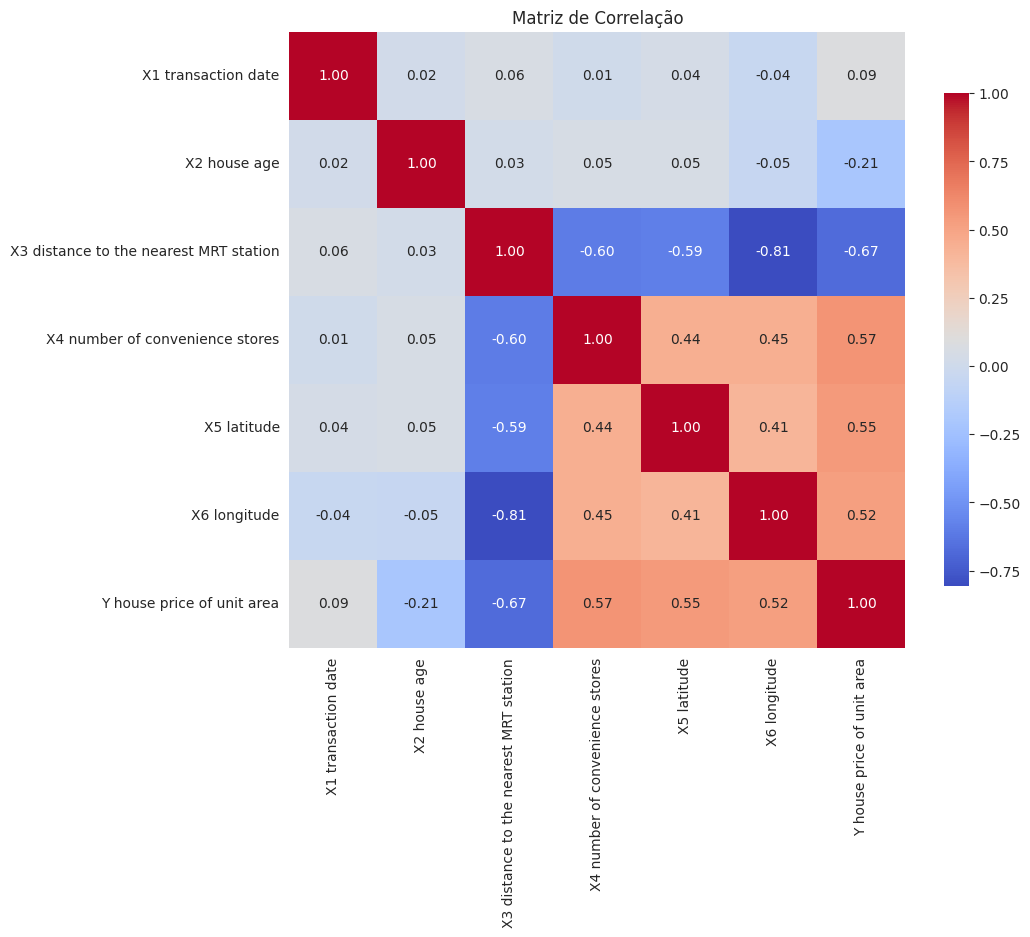

In [9]:
correlacao = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Matriz de Correlação")
plt.show()


Iniciando a geração dos gráficos de diagnóstico...


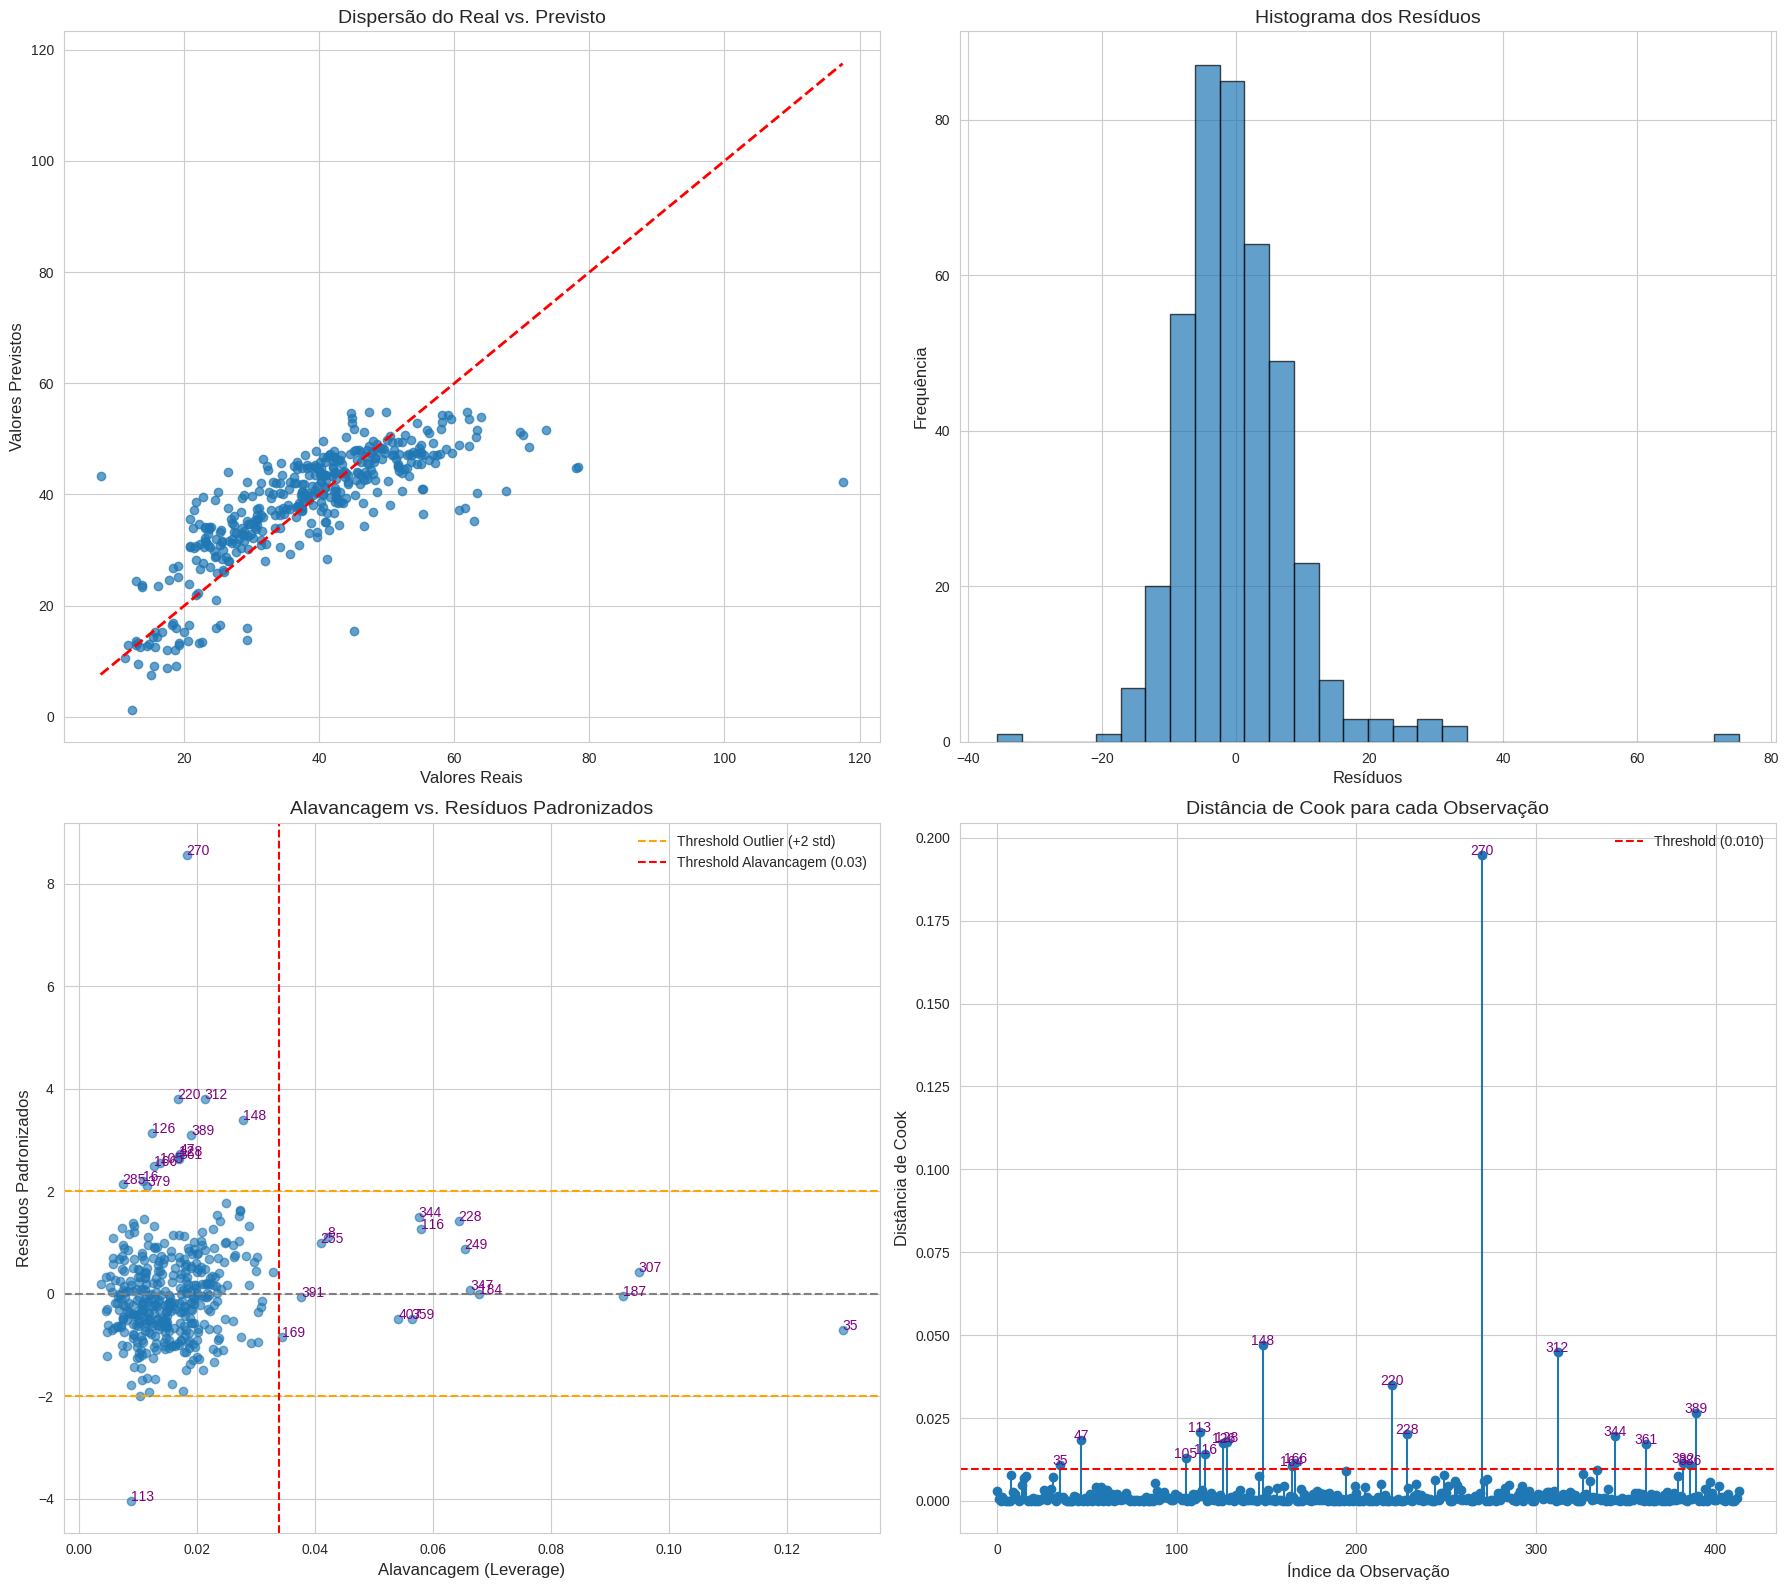


--- Interpretação dos Gráficos de Diagnóstico ---
Número de observações (n): 414
Número de preditores (k+1): 7
Threshold para alavancagem (2*(k+1)/n): 0.0338
Threshold para Distância de Cook (4/n): 0.0097

Pontos com alta alavancagem ou resíduo padronizado > 2: [  8  16  35  47 105 113 116 126 128 148 166 169 184 187 220 228 249 255
 270 285 307 312 344 347 359 361 379 389 391 407]
Pontos com alta Distância de Cook: [ 35  47 105 113 116 126 128 148 164 166 220 228 270 312 344 361 382 386
 389]

Análise concluída. Imagem 'diagnostico_mqo_completo.png' foi salva.


In [12]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Adicionando a constante (intercepto) ao modelo, essencial para o statsmodels
X_const = sm.add_constant(X)

# --- Treinamento do Modelo MQO ---
model = sm.OLS(y, X_const)
results = model.fit()

# --- Análise de Influência e Diagnóstico ---
# Objeto de influência que contém todas as métricas de diagnóstico
influence = results.get_influence()

# Métricas principais
cooks_d = influence.cooks_distance[0]
leverage = influence.hat_matrix_diag
student_resid = influence.resid_studentized_internal

# --- Visualização dos Resultados ---
print("Iniciando a geração dos gráficos de diagnóstico...")

fig, ax = plt.subplots(2, 2, figsize=(18, 16))
plt.style.use('seaborn-v0_8-whitegrid')

# 1. Gráfico de Dispersão: Real vs. Previsto
ax[0, 0].scatter(y, results.predict(), alpha=0.7)
ax[0, 0].plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
ax[0, 0].set_xlabel('Valores Reais', fontsize=12)
ax[0, 0].set_ylabel('Valores Previstos', fontsize=12)
ax[0, 0].set_title('Dispersão do Real vs. Previsto', fontsize=14)
ax[0, 0].grid(True)

# 2. Histograma dos Resíduos
ax[0, 1].hist(results.resid, bins=30, edgecolor='black', alpha=0.7)
ax[0, 1].set_xlabel('Resíduos', fontsize=12)
ax[0, 1].set_ylabel('Frequência', fontsize=12)
ax[0, 1].set_title('Histograma dos Resíduos', fontsize=14)

# 3. Gráfico de Alavancagem vs. Resíduos Padronizados
# Identifica outliers e pontos de alavancagem
n_obs = len(y)
n_features = X_const.shape[1]
leverage_threshold = 2 * n_features / n_obs

ax[1, 0].scatter(leverage, student_resid, alpha=0.6)
ax[1, 0].axhline(0, color='grey', linestyle='--')
ax[1, 0].axhline(2, color='orange', linestyle='--', label='Threshold Outlier (+2 std)')
ax[1, 0].axhline(-2, color='orange', linestyle='--')
ax[1, 0].axvline(leverage_threshold, color='red', linestyle='--', label=f'Threshold Alavancagem ({leverage_threshold:.2f})')
ax[1, 0].set_xlabel('Alavancagem (Leverage)', fontsize=12)
ax[1, 0].set_ylabel('Resíduos Padronizados', fontsize=12)
ax[1, 0].set_title('Alavancagem vs. Resíduos Padronizados', fontsize=14)
ax[1, 0].legend()

# Anotar pontos influentes no gráfico de alavancagem
influential_points = np.where((leverage > leverage_threshold) | (np.abs(student_resid) > 2))[0]
for i in influential_points:
    ax[1, 0].annotate(i, (leverage[i], student_resid[i]), color='purple')

# 4. Gráfico da Distância de Cook
# Identifica pontos que, se removidos, mudam significativamente o modelo
cooks_threshold = 4 / n_obs

ax[1, 1].stem(np.arange(n_obs), cooks_d, basefmt=" ")
ax[1, 1].axhline(cooks_threshold, color='red', linestyle='--', label=f'Threshold ({cooks_threshold:.3f})')
ax[1, 1].set_xlabel('Índice da Observação', fontsize=12)
ax[1, 1].set_ylabel("Distância de Cook", fontsize=12)
ax[1, 1].set_title("Distância de Cook para cada Observação", fontsize=14)
ax[1, 1].legend()

# Anotar pontos com alta Distância de Cook
high_cooks_points = np.where(cooks_d > cooks_threshold)[0]
for i in high_cooks_points:
    ax[1, 1].annotate(i, (i, cooks_d[i]), color='purple', ha='center')

plt.tight_layout()
plt.savefig("diagnostico_mqo_completo.png")
plt.show()

print("\n--- Interpretação dos Gráficos de Diagnóstico ---")
print(f"Número de observações (n): {n_obs}")
print(f"Número de preditores (k+1): {n_features}")
print(f"Threshold para alavancagem (2*(k+1)/n): {leverage_threshold:.4f}")
print(f"Threshold para Distância de Cook (4/n): {cooks_threshold:.4f}")
print(f"\nPontos com alta alavancagem ou resíduo padronizado > 2: {influential_points}")
print(f"Pontos com alta Distância de Cook: {high_cooks_points}")
print("\nAnálise concluída. Imagem 'diagnostico_mqo_completo.png' foi salva.")